# 1 Import Packages

In [1]:
import xarray as xr
import numpy as np
import os

import src.config as config
import src.utils as utils

from tqdm import tqdm

import matplotlib.pyplot as plt
import tensorflow as tf
tf.compat.v1.disable_eager_execution()


2023-02-08 16:15:23.781550: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# 2 Metadata

In [2]:
ml_transform_path = os.path.join(config.data_pro_path,"ml_transform")

In [3]:
lev_index = 0

In [4]:
train_x_filename = "train_data_stack_lonlatstandardized.nc"
valid_x_filename = "valid_data_stack_lonlatstandardized.nc"

train_y_filename = "train_data_amoc_depth_1020_lat_26_samplestandardized.nc"
valid_y_filename = "valid_data_amoc_depth_1020_lat_26_samplestandardized.nc"

# 3 Load Data

In [5]:
train_x_xr = xr.open_dataset(os.path.join(ml_transform_path, train_x_filename)).isel(lev=lev_index)
valid_x_xr = xr.open_dataset(os.path.join(ml_transform_path, valid_x_filename)).isel(lev=lev_index)

In [6]:
train_y_xr = xr.open_dataset(os.path.join(ml_transform_path, train_y_filename))
valid_y_xr = xr.open_dataset(os.path.join(ml_transform_path, valid_y_filename))

In [7]:
train_data_amoc_depth_1020_lat_26_samplestd  = xr.load_dataset(os.path.join(ml_transform_path,"train_data_amoc_depth_1020_lat_26_samplestd.nc" ))
train_data_amoc_depth_1020_lat_26_samplemean = xr.load_dataset(os.path.join(ml_transform_path,"train_data_amoc_depth_1020_lat_26_samplemean,nc"))

# 4 Processing

In [8]:
train_x_xr_stack = train_x_xr.stack(sample=("realization","time"))
valid_x_xr_stack = valid_x_xr.stack(sample=("realization","time"))

In [9]:
train_y_xr_stack = train_y_xr.stack(sample=("realization","time"))
valid_y_xr_stack = valid_y_xr.stack(sample=("realization","time"))


In [73]:
valid_sample_coords = valid_y_xr_stack.sample
train_sample_coords = train_y_xr_stack.sample

train_x_ml_np = np.nan_to_num(np.expand_dims(train_x_xr_stack["rho"].transpose("sample",...).values,3),0)
valid_x_ml_np = np.nan_to_num(np.expand_dims(valid_x_xr_stack["rho"].transpose("sample",...).values,3),0)

train_y_ml_np = train_y_xr_stack["atlantic_moc"].values
valid_y_ml_np = valid_y_xr_stack["atlantic_moc"].values

In [74]:
train_batch_size = int(train_x_ml_.shape[0]/4)
valid_batch_size = valid_x_ml_pt.shape[0]

NameError: name 'train_x_ml_' is not defined

In [12]:
train_dataset = TensorDataset(train_x_ml_pt, train_y_ml_pt)  
valid_dataset = TensorDataset(valid_x_ml_pt, valid_y_ml_pt)
data_train_loader = DataLoader(train_dataset, batch_size=train_batch_size, shuffle=True)
data_valid_loader = DataLoader(valid_dataset, batch_size=valid_batch_size, shuffle=True)

NameError: name 'TensorDataset' is not defined

# 5 Model

In [95]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(4,(4,4), activation="tanh", padding="same",input_shape=(120,121,1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(tf.keras.layers.Conv2D(4,(4,4), activation="tanh", padding="same", input_shape=(60,60,4)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(4, activation="tanh"))

model.add(tf.keras.layers.Dense(1, activation="linear"))

In [99]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 120, 121, 4)       68        
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 60, 60, 4)        0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 60, 60, 4)         260       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 30, 30, 4)        0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 3600)              0         
                                                                 
 dense_8 (Dense)             (None, 4)               

# Train Model

In [100]:
model.compile(optimizer = "adam", loss=tf.keras.losses.mse)

In [101]:
model.fit(x=train_x_ml_np, y=train_y_ml_np, batch_size=2000, epochs=100, validation_data=(valid_x_ml_np, valid_y_ml_np) )

Train on 7800 samples, validate on 1560 samples
Epoch 1/100
7800/7800 [==============================] - 3s 445us/sample - loss: 0.9515 - val_loss: 0.9096
Epoch 2/100
7800/7800 [==============================] - 3s 436us/sample - loss: 0.9291 - val_loss: 0.9138
Epoch 3/100
7800/7800 [==============================] - 3s 407us/sample - loss: 0.9037 - val_loss: 0.8366
Epoch 4/100
7800/7800 [==============================] - 3s 398us/sample - loss: 0.8824 - val_loss: 0.8232
Epoch 5/100
7800/7800 [==============================] - 3s 438us/sample - loss: 0.8598 - val_loss: 0.8246
Epoch 6/100
7800/7800 [==============================] - 3s 374us/sample - loss: 0.8374 - val_loss: 0.7888
Epoch 7/100
7800/7800 [==============================] - 3s 408us/sample - loss: 0.8189 - val_loss: 0.7866
Epoch 8/100
7800/7800 [==============================] - 3s 428us/sample - loss: 0.7966 - val_loss: 0.7519
Epoch 9/100
7800/7800 [==============================] - 3s 414us/sample - loss: 0.7784 - val_lo

In [ ]:
model.

In [102]:
model.predict(train_x_ml_np)

/work/uo1075/u301101/programming/miniconda3/envs/CNN/lib/python3.8/site-packages/keras/engine/training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


array([[ 0.9176743 ],
       [ 1.0230993 ],
       [ 1.1683558 ],
       ...,
       [ 0.62387896],
       [-0.14063926],
       [ 0.11325827]], dtype=float32)

In [103]:
analyzer = innvestigate.create_analyzer("lrp.epsilon", model)

In [104]:
heatmaps = analyzer.analyze(train_x_ml_np[:,:,:,:])

In [89]:
heatmaps

array([[[[ 0.0000000e+00],
         [ 0.0000000e+00],
         [-0.0000000e+00],
         ...,
         [-4.7129467e-03],
         [ 2.9532302e-03],
         [ 1.2406789e-03]],

        [[ 0.0000000e+00],
         [ 0.0000000e+00],
         [-0.0000000e+00],
         ...,
         [-4.7329225e-04],
         [-4.4870954e-03],
         [-3.1972993e-03]],

        [[-0.0000000e+00],
         [-0.0000000e+00],
         [-0.0000000e+00],
         ...,
         [ 4.1398630e-03],
         [-7.1196174e-03],
         [-8.2884664e-03]],

        ...,

        [[ 0.0000000e+00],
         [ 0.0000000e+00],
         [-0.0000000e+00],
         ...,
         [ 0.0000000e+00],
         [ 0.0000000e+00],
         [-0.0000000e+00]],

        [[-0.0000000e+00],
         [-0.0000000e+00],
         [ 0.0000000e+00],
         ...,
         [ 0.0000000e+00],
         [ 0.0000000e+00],
         [-0.0000000e+00]],

        [[ 0.0000000e+00],
         [ 0.0000000e+00],
         [ 0.0000000e+00],
         ...,
 

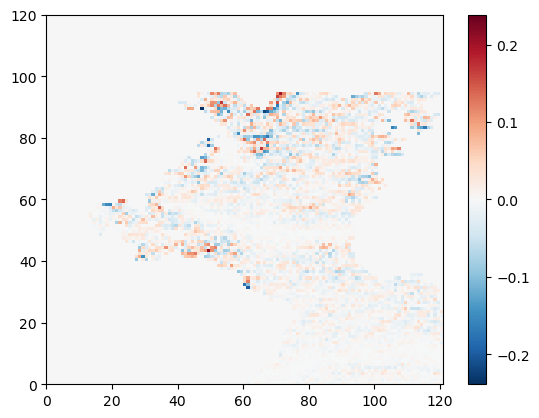

In [107]:
tmp = heatmaps[423,:,:,0]

vmax = np.abs(tmp).max()

plot = plt.pcolormesh(tmp,vmin=-vmax, vmax=vmax,  cmap="RdBu_r")
plt.colorbar(plot)

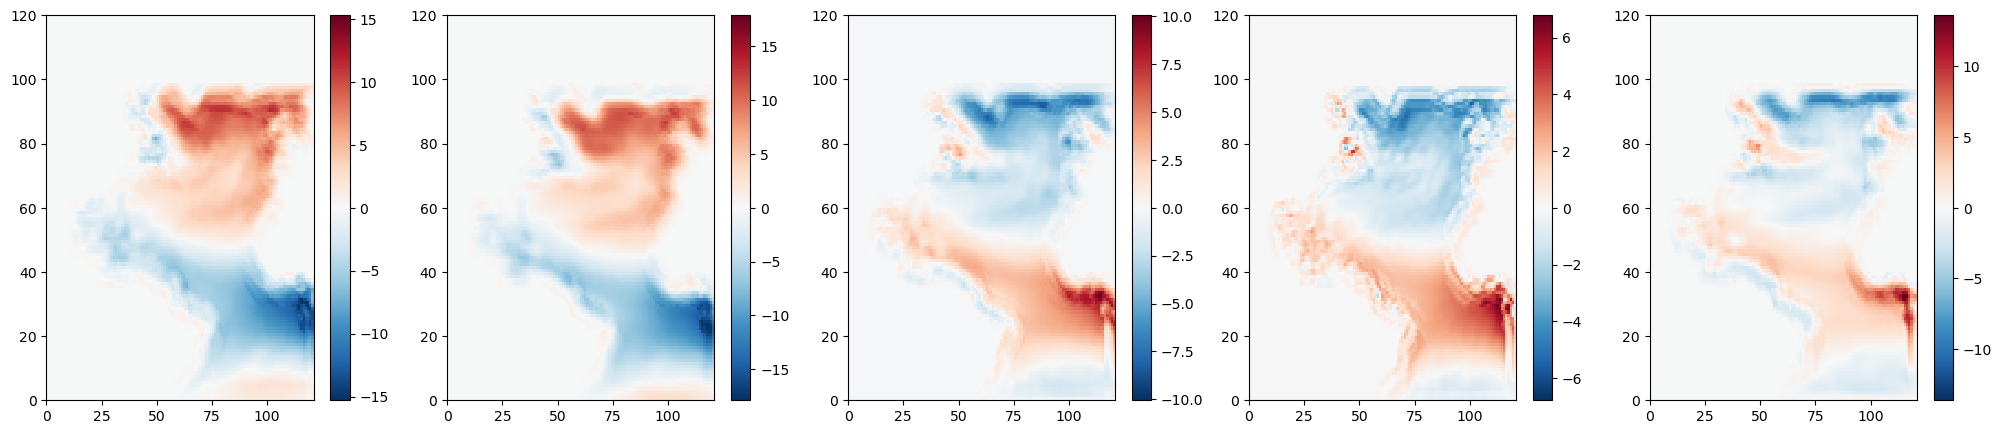

In [153]:
fig, ax = plt.subplots(1,5, figsize=(25,5))

ax_ravel = np.ravel(ax)

for i, ax in enumerate(ax_ravel):
    ax = ax_ravel[i]
    tmp = activation["first_conv"][235,i]
    vmax= np.abs(tmp).max()
    
    plot = ax.pcolormesh(tmp, vmin=-vmax, vmax=vmax, cmap="RdBu_r")
    plt.colorbar(plot, ax = ax)

# 8 LRP

In [154]:
import zennit

In [170]:
composite = zennit.composites.EpsilonPlusFlat()

In [171]:
composite.context(module = net)

In [176]:
torch.eye(1)[[0]]

tensor([[1.]])

In [178]:
with composite.context(net) as modified_model:
    output = modified_model(x_example[0,:])
    output.backward(gradient = torch.eye(1)[[0]])

RuntimeError: mat1 and mat2 shapes cannot be multiplied (5x49 and 245x5)

In [164]:
with Gradient(model=net, composite=composite) as atributor:
    output, attribution = attributor(x_example, y_example)

NameError: name 'Gradient' is not defined

In [224]:

torch.save(net.state_dict(),"model_state")

In [193]:
a.shape

(5, 1, 10, 10)

In [27]:
tmp = a[4,0]
vmax = np.abs(tmp).max()
plot = plt.pcolormesh(tmp, vmin = -vmax, vmax= vmax, cmap="RdBu_r")
plt.colorbar(plot)

NameError: name 'a' is not defined

(0.0, 2.0)

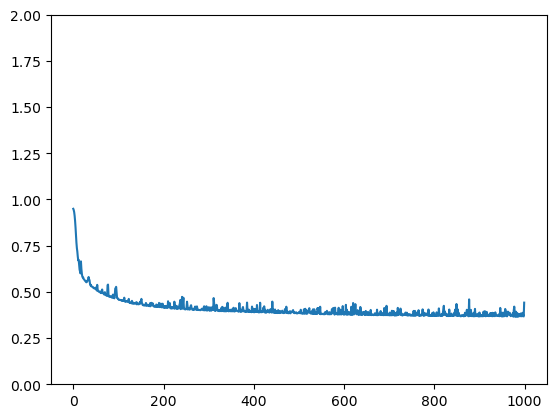

In [199]:
plt.plot(valid_loss_arr)
plt.ylim(0,2)

(0.0, 2.0)

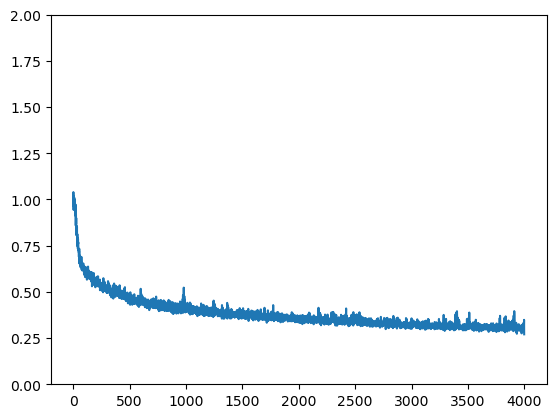

In [200]:
plt.plot(train_loss_arr)
plt.ylim(0,2)

In [201]:
valid_loss_arr[-1]

array(0.4417853, dtype=float32)

In [202]:
y_train_pred = net(train_x_ml_pt).detach().numpy()
y_train_true = train_y_ml_pt.detach().numpy()

y_valid_pred = net(valid_x_ml_pt).detach().numpy()
y_valid_true = valid_y_ml_pt.detach().numpy()

(-4.0, 4.0)

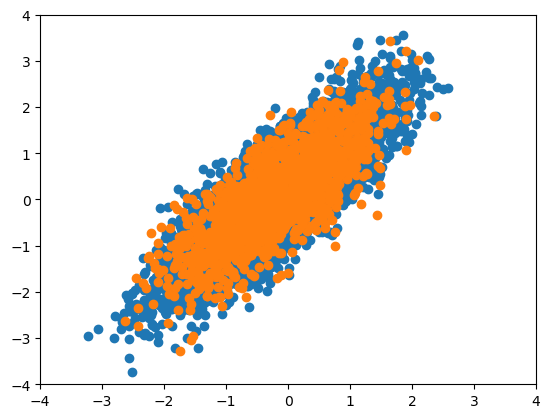

In [203]:
plt.scatter(y_train_pred, y_train_true)
plt.scatter(y_valid_pred, y_valid_true)

plt.xlim(-4,4)
plt.ylim(-4,4)